# StockWizard: Machine Learning-Based Stock Price Prediction for Indian Equities

StockWizard is an end-to-end machine learning project designed to analyze historical stock trends and forecast future prices of top Indian companies using publicly available financial data.

This project focuses on five major NSE-listed companies and aims to build robust predictive models using technical indicators and supervised learning algorithms.

## Project Objectives

- Retrieve and process historical stock data using the yfinance API
- Engineer features using commonly used technical indicators (SMA, EMA, RSI)
- Build and evaluate machine learning models:
  - Linear Regression
  - Random Forest Regressor
  - XGBoost Regressor
- Compare model performance using standard metrics (MSE, MAE, R²)
- Visualize actual vs predicted price movements for each stock

## Tools and Technologies

- Programming Language: Python
- Data Source: Yahoo Finance (via yfinance)
- Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost
- Models: Linear Regression, Random Forest, XGBoost

## Companies Analyzed

- RELIANCE.NS
- INFY.NS
- TCS.NS
- HDFCBANK.NS
- ITC.NS

This notebook demonstrates skills in data preprocessing, technical analysis, feature engineering, and applied machine learning for financial time series.


In [26]:
!pip install yfinance --upgrade --quiet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
plt.style.use('ggplot')


In [27]:
symbols = ["RELIANCE.NS", "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ITC.NS"]
end = datetime.today()
start = end - timedelta(days=365)
data = yf.download(symbols, start=start, end=end, group_by='ticker')


/tmp/ipython-input-27-1380316756.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start=start, end=end, group_by='ticker')
[*********************100%***********************]  5 of 5 completed


In [28]:
for symbol in symbols:
    print(f"\n{symbol}")
    display(data[symbol].info())
    display(data[symbol].describe())
    display(data[symbol].isnull().sum())



RELIANCE.NS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-25 to 2025-07-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


None

Price,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1356.990230,1368.477184,1345.268186,1356.219696,1.308344e+07
std,107.850923,107.332352,108.076664,107.186840,6.500001e+06
min,1132.199951,1171.250000,1114.849976,1161.900024,0.000000e+00
25%,1258.225006,1269.950012,1243.862488,1253.925018,8.777241e+06
50%,1340.000000,1360.737488,1334.000000,1343.625000,1.126159e+07
75%,1458.199697,1469.631287,1447.079008,1456.700043,1.593660e+07
max,1536.699951,1551.000000,1530.199951,1541.500000,4.162073e+07


,0
Price,
Open,0
High,0
Low,0
Close,0
Volume,0



INFY.NS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-25 to 2025-07-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


None

Price,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1731.854389,1749.478436,1714.786410,1732.120340,6.602176e+06
std,156.760117,157.099444,155.653123,155.752079,3.081371e+06
min,1333.241141,1386.393308,1288.865511,1377.370239,0.000000e+00
25%,1584.668823,1607.875000,1570.399963,1585.724976,4.433503e+06
50%,1798.409296,1818.126096,1780.670822,1797.558167,5.896862e+06
75%,1860.818107,1883.277981,1845.151030,1857.809509,7.968346e+06
max,1967.763256,1978.610690,1950.160948,1971.954346,2.171525e+07


,0
Price,
Open,0
High,0
Low,0
Close,0
Volume,0



TCS.NS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-25 to 2025-07-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


None

Price,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,3858.017408,3892.884769,3822.230723,3854.379094,2.413424e+06
std,399.256372,403.655610,395.172371,398.517620,1.158990e+06
min,3062.296323,3173.699951,3018.880912,3148.000000,0.000000e+00
25%,3449.528742,3480.657926,3421.017383,3452.032532,1.683680e+06
50%,4005.845834,4049.756574,3962.487280,3994.915771,2.179885e+06
75%,4183.544295,4225.139776,4151.067304,4186.776611,2.886206e+06
max,4498.623077,4514.598013,4435.705272,4476.749023,7.894300e+06


,0
Price,
Open,0
High,0
Low,0
Close,0
Volume,0



HDFCBANK.NS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-25 to 2025-07-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


None

Price,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1763.487150,1777.953056,1750.645454,1764.347284,1.424455e+07
std,125.624567,125.437848,125.141133,125.238850,1.926586e+07
min,1575.665980,1596.140635,1575.665980,1583.776733,0.000000e+00
25%,1660.260370,1672.859314,1647.982857,1663.178223,8.534966e+06
50%,1730.660850,1745.967473,1717.208810,1730.388855,1.150200e+07
75%,1893.939619,1909.073112,1883.850595,1895.472809,1.597910e+07
max,2037.699951,2037.699951,2008.400024,2024.300049,2.226710e+08


,0
Price,
Open,0
High,0
Low,0
Close,0
Volume,0



ITC.NS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-25 to 2025-07-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


None

Price,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,441.996107,445.743567,438.059440,441.620145,1.510697e+07
std,32.370693,32.693000,31.943376,32.236277,2.716855e+07
min,383.091492,390.013972,383.091492,387.706482,0.000000e+00
25%,417.162498,420.157081,414.949997,416.875008,8.646527e+06
50%,428.897535,432.748918,424.615193,427.743790,1.270017e+07
75%,470.359966,475.446955,465.865023,470.372047,1.699346e+07
max,503.238119,510.874687,502.899822,505.316437,4.318516e+08


,0
Price,
Open,0
High,0
Low,0
Close,0
Volume,0


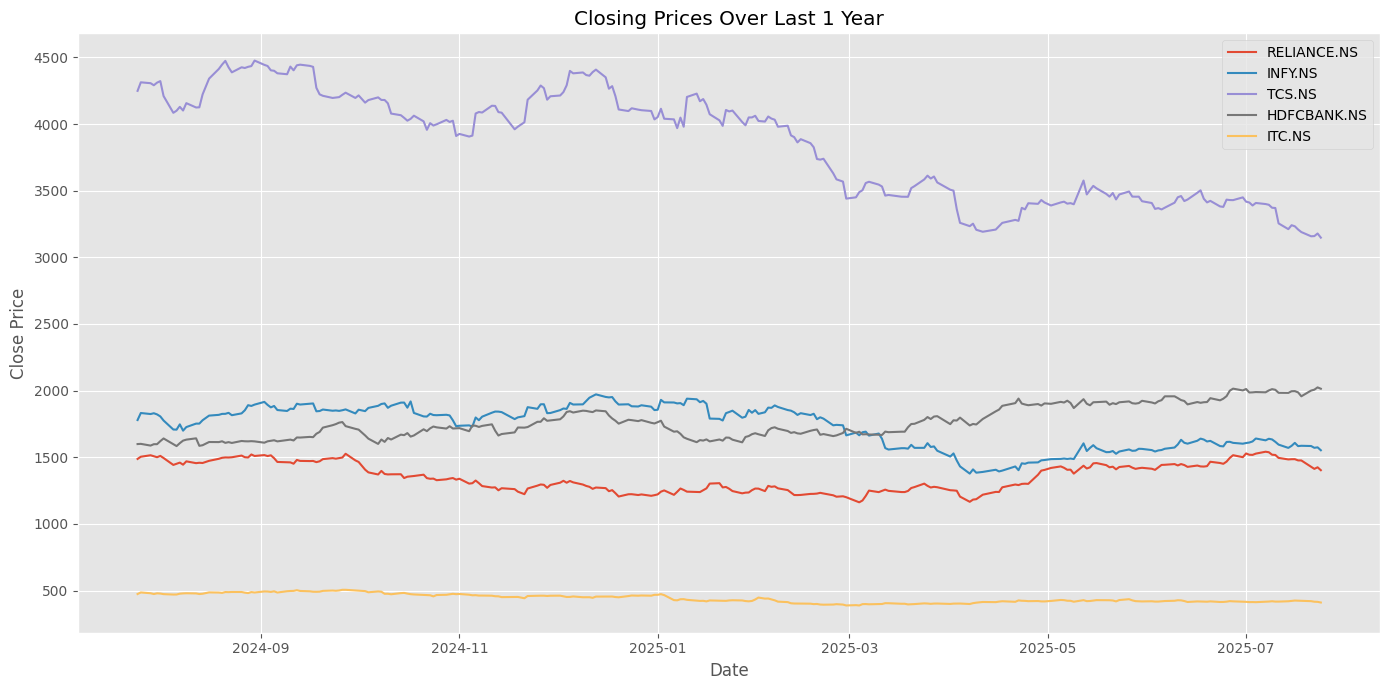

In [29]:
plt.figure(figsize=(14,7))
for symbol in symbols:
    plt.plot(data[symbol]['Close'], label=symbol)
plt.title('Closing Prices Over Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
processed_data = {}

def add_indicators(df):
    df = df.copy()
    df['SMA_14'] = df['Close'].rolling(window=14).mean()
    df['EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    return df

for symbol in symbols:
    processed_data[symbol] = add_indicators(data[symbol])


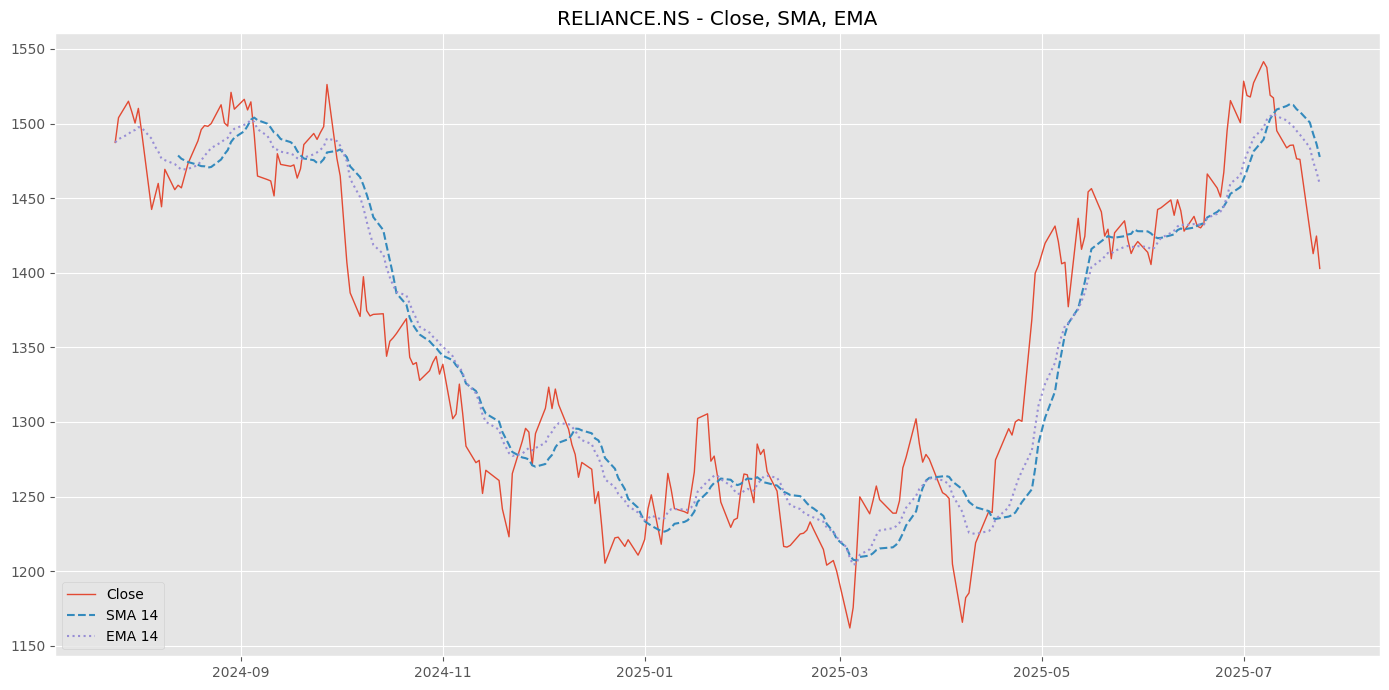

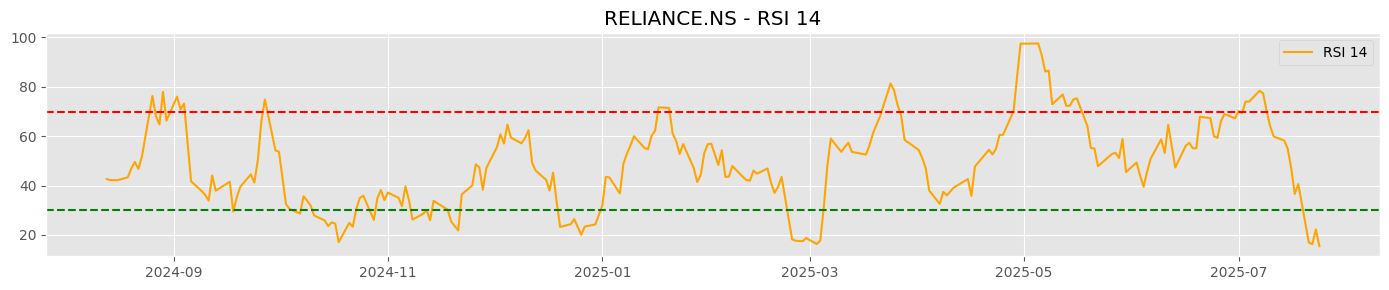

In [32]:
symbol = "RELIANCE.NS"
df = processed_data[symbol]

plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close', linewidth=1)
plt.plot(df['SMA_14'], label='SMA 14', linestyle='--')
plt.plot(df['EMA_14'], label='EMA 14', linestyle=':')
plt.title(f'{symbol} - Close, SMA, EMA')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df['RSI_14'], label='RSI 14', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f'{symbol} - RSI 14')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
def prepare_ml_data(df, n_lags=3):
    df = df.copy()
    for i in range(1, n_lags + 1):
        df[f'Close_{i}'] = df['Close'].shift(i)
    df['Next_Close'] = df['Close'].shift(-1)
    df = df.dropna()
    return df

ml_data = {}
for symbol in symbols:
    ml_data[symbol] = prepare_ml_data(processed_data[symbol])


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

results = {}

for symbol in symbols:
    df = ml_data[symbol]
    X = df[[f'Close_{i}' for i in range(1, 4)]]
    y = df['Next_Close']

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[symbol] = {'model': model, 'mse': mse, 'mae': mae, 'r2': r2, 'y_test': y_test, 'y_pred': y_pred}



RELIANCE.NS
MSE: 473.72
MAE: 15.97
R²:  0.7095


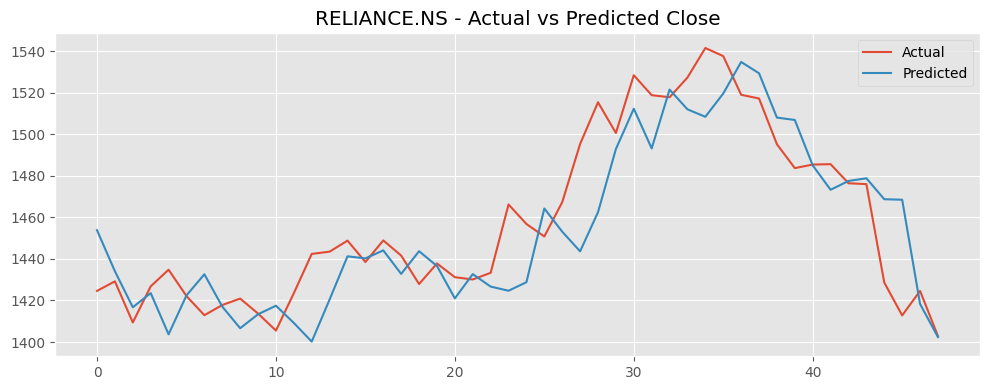


INFY.NS
MSE: 520.04
MAE: 18.47
R²:  0.4848


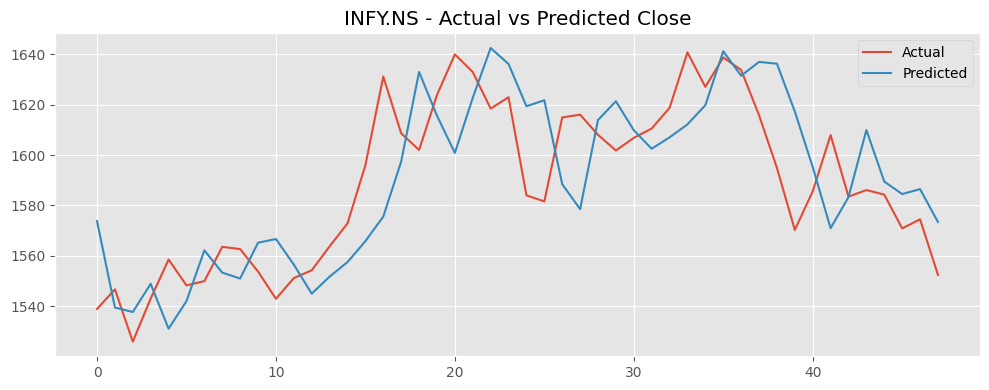


TCS.NS
MSE: 2528.75
MAE: 39.68
R²:  0.7415


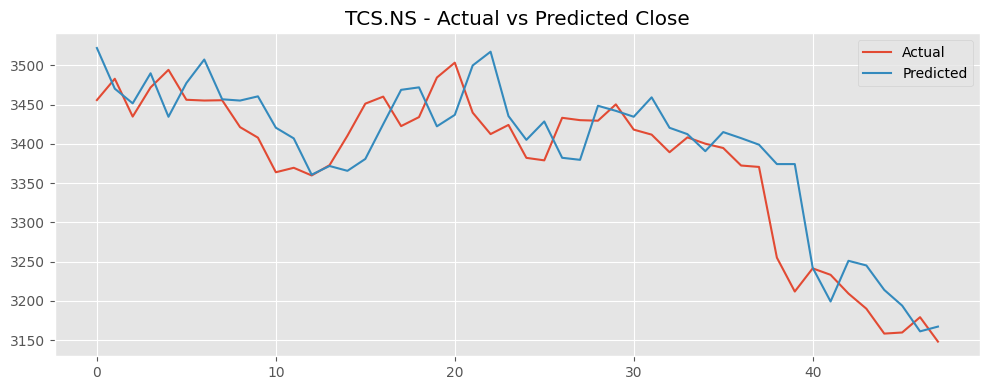


HDFCBANK.NS
MSE: 640.33
MAE: 20.06
R²:  0.6309


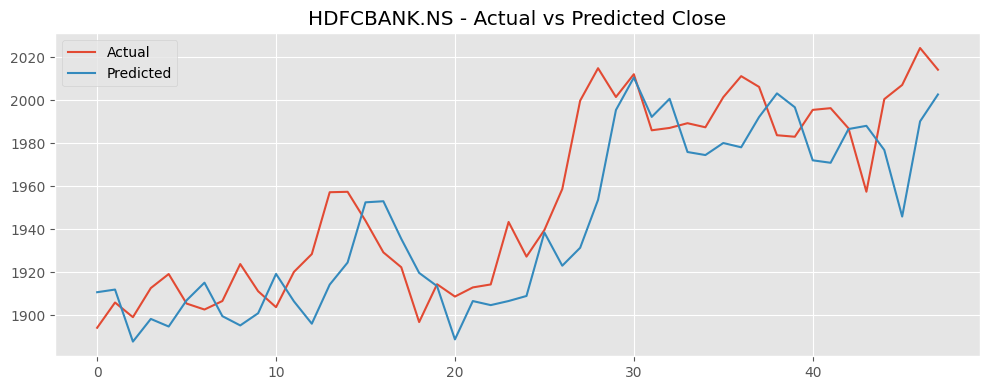


ITC.NS
MSE: 25.55
MAE: 3.97
R²:  -0.1276


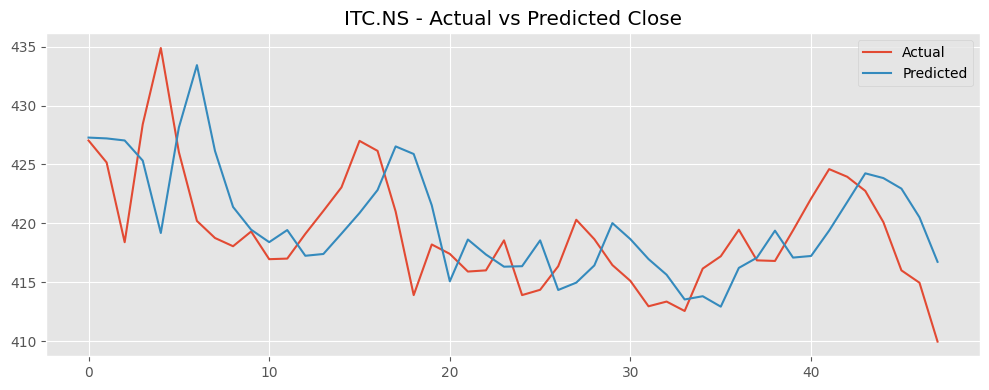

In [35]:
for symbol in symbols:
    print(f'\n{symbol}')
    print(f"MSE: {results[symbol]['mse']:.2f}")
    print(f"MAE: {results[symbol]['mae']:.2f}")
    print(f"R²:  {results[symbol]['r2']:.4f}")

    y_test = results[symbol]['y_test'].values
    y_pred = results[symbol]['y_pred']

    plt.figure(figsize=(10,4))
    plt.plot(y_test, label='Actual', linewidth=1.5)
    plt.plot(y_pred, label='Predicted', linewidth=1.5)
    plt.title(f'{symbol} - Actual vs Predicted Close')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [36]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

for symbol in symbols:
    df = ml_data[symbol]
    X = df[[f'Close_{i}' for i in range(1, 4)]]
    y = df['Next_Close']

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)

    results[symbol]['rf_model'] = rf
    results[symbol]['xgb_model'] = xgb
    results[symbol]['rf_pred'] = rf_pred
    results[symbol]['xgb_pred'] = xgb_pred


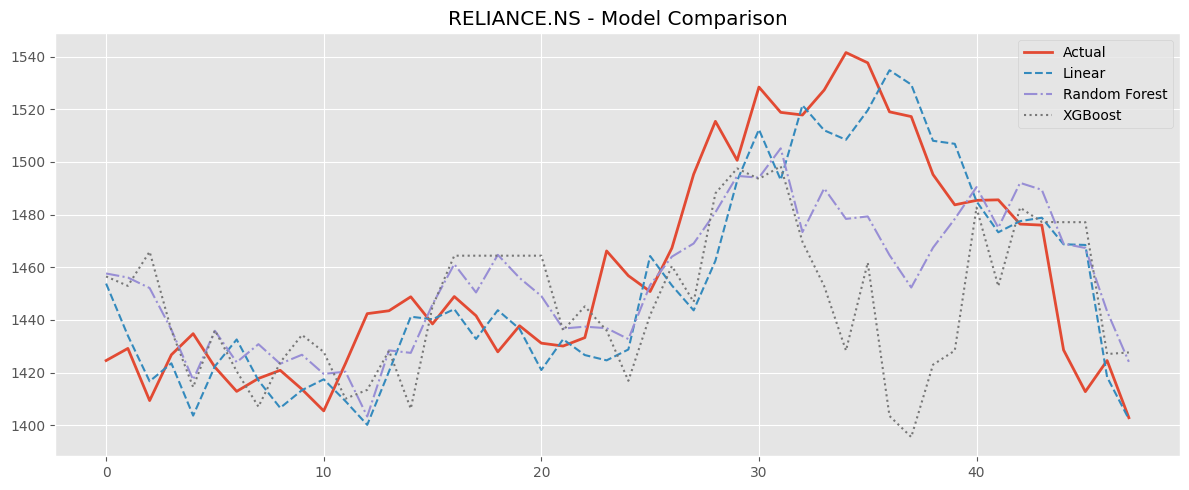

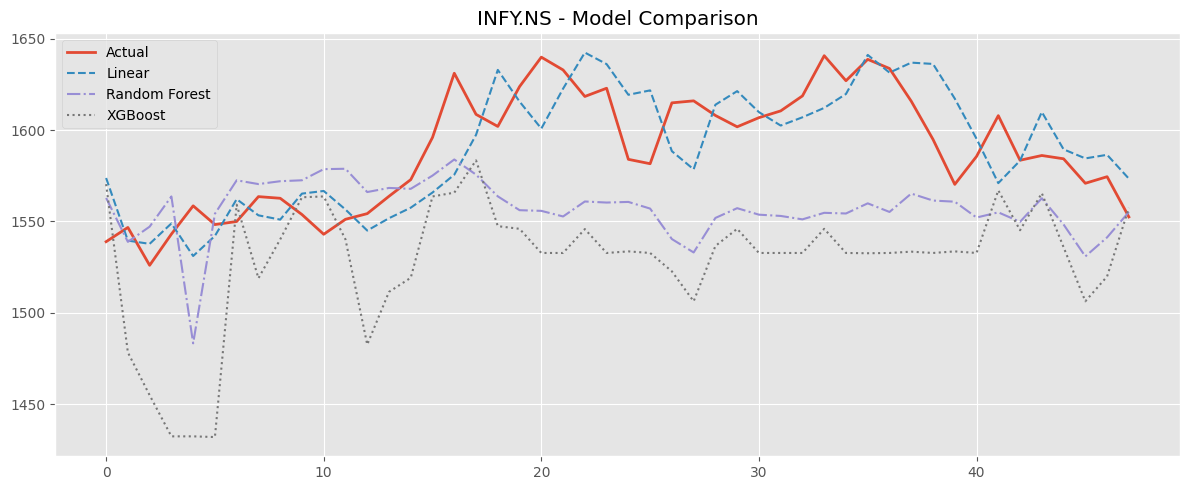

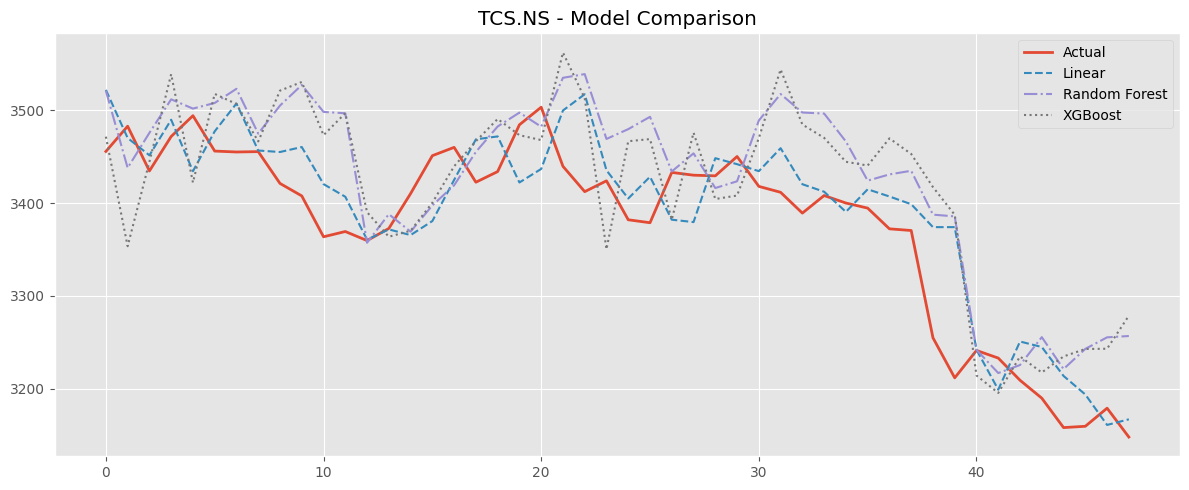

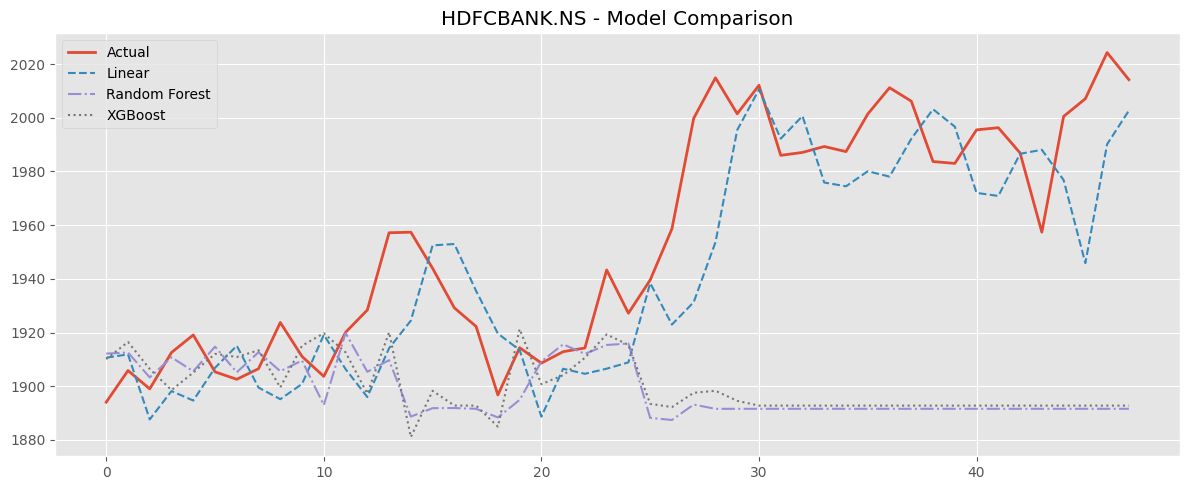

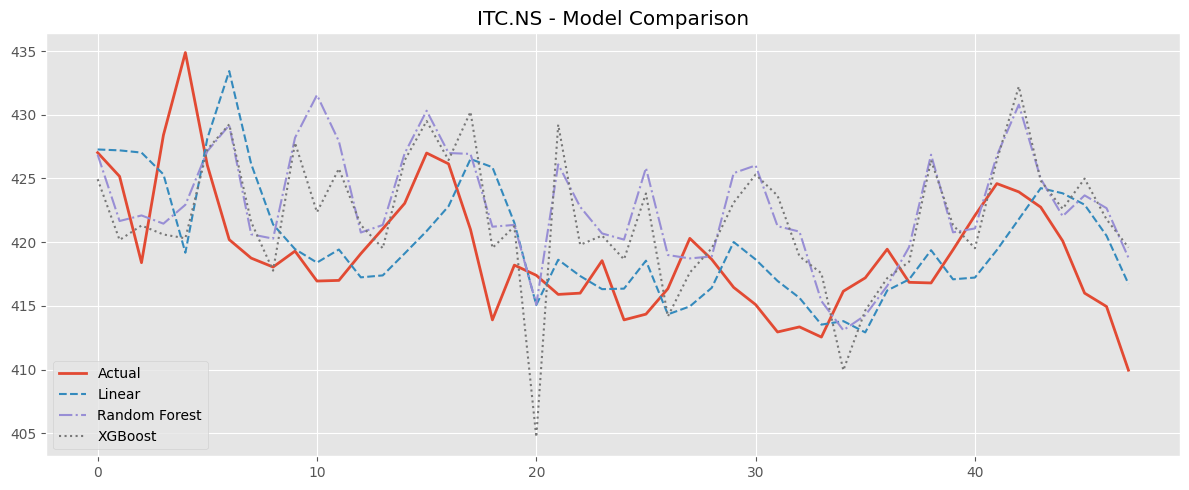

In [37]:
for symbol in symbols:
    y_test = results[symbol]['y_test'].values
    lr_pred = results[symbol]['y_pred']
    rf_pred = results[symbol]['rf_pred']
    xgb_pred = results[symbol]['xgb_pred']

    plt.figure(figsize=(12,5))
    plt.plot(y_test, label='Actual', linewidth=2)
    plt.plot(lr_pred, label='Linear', linestyle='--')
    plt.plot(rf_pred, label='Random Forest', linestyle='-.')
    plt.plot(xgb_pred, label='XGBoost', linestyle=':')
    plt.title(f'{symbol} - Model Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [38]:
score_table = []

for symbol in symbols:
    y_test = results[symbol]['y_test']

    lr_pred = results[symbol]['y_pred']
    rf_pred = results[symbol]['rf_pred']
    xgb_pred = results[symbol]['xgb_pred']

    score_table.append([
        symbol,
        'Linear',
        mean_squared_error(y_test, lr_pred),
        mean_absolute_error(y_test, lr_pred),
        r2_score(y_test, lr_pred)
    ])

    score_table.append([
        symbol,
        'Random Forest',
        mean_squared_error(y_test, rf_pred),
        mean_absolute_error(y_test, rf_pred),
        r2_score(y_test, rf_pred)
    ])

    score_table.append([
        symbol,
        'XGBoost',
        mean_squared_error(y_test, xgb_pred),
        mean_absolute_error(y_test, xgb_pred),
        r2_score(y_test, xgb_pred)
    ])

score_df = pd.DataFrame(score_table, columns=['Stock', 'Model', 'MSE', 'MAE', 'R2'])
print(score_df.sort_values(['Stock', 'Model']))


          Stock          Model          MSE        MAE        R2
9   HDFCBANK.NS         Linear   640.329213  20.061907  0.630899
10  HDFCBANK.NS  Random Forest  5461.364662  57.680952 -2.148060
11  HDFCBANK.NS        XGBoost  5284.920778  57.600327 -2.046354
3       INFY.NS         Linear   520.042606  18.470191  0.484835
4       INFY.NS  Random Forest  2264.221490  40.344135 -1.242983
5       INFY.NS        XGBoost  4914.751634  62.754283 -3.868652
12       ITC.NS         Linear    25.547953   3.969306 -0.127590
13       ITC.NS  Random Forest    39.941215   5.105636 -0.762855
14       ITC.NS        XGBoost    41.516354   5.274845 -0.832375
0   RELIANCE.NS         Linear   473.722301  15.967962  0.709530
1   RELIANCE.NS  Random Forest   809.938555  22.848096  0.503374
2   RELIANCE.NS        XGBoost  1919.831699  32.464722 -0.177174
6        TCS.NS         Linear  2528.752176  39.675255  0.741515
7        TCS.NS  Random Forest  5514.351372  61.365490  0.436333
8        TCS.NS        XG